In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [13]:
(x_train, y_train), (x_test,y_test)  = keras.datasets.mnist.load_data()
x_train = x_train /255
x_test = x_test /255 



array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(392,activation='relu'),
    keras.layers.Dense(196,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),

])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

tensor_call = keras.callbacks.TensorBoard(log_dir="./logs",histogram_freq=1)

2023-06-09 20:40:05.214980: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-09 20:40:05.275004: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
model.fit(x_train,y_train,epochs=15,callbacks=[tensor_call])

2023-06-09 20:40:10.136553: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/15
1873/1875 [============================>.] - ETA: 0s - loss: 0.1924 - accuracy: 0.9409

2023-06-09 20:40:20.501810: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 73758720 exceeds 10% of free system memory.


1875/1875 [==============================] - 10s 5ms/step - loss: 0.1923 - accuracy: 0.9409
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0828 - accuracy: 0.9744
Epoch 3/15
  24/1875 [..............................] - ETA: 8s - loss: 0.0685 - accuracy: 0.9831

2023-06-09 20:40:29.126839: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 73758720 exceeds 10% of free system memory.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.0561 - accuracy: 0.9822
Epoch 4/15
  12/1875 [..............................] - ETA: 8s - loss: 0.0334 - accuracy: 0.9896 

2023-06-09 20:40:37.549489: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 73758720 exceeds 10% of free system memory.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.0427 - accuracy: 0.9862
Epoch 5/15
  24/1875 [..............................] - ETA: 8s - loss: 0.0242 - accuracy: 0.9935

2023-06-09 20:40:45.953834: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 73758720 exceeds 10% of free system memory.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.0322 - accuracy: 0.9898
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0288 - accuracy: 0.9904
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0229 - accuracy: 0.9929
Epoch 8/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0200 - accuracy: 0.9934
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0198 - accuracy: 0.9936
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0158 - accuracy: 0.9951
Epoch 11/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0151 - accuracy: 0.9949
Epoch 12/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0140 - accuracy: 0.9956
Epoch 13/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0126 - accuracy: 0.9963
Epoch 14/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0116 - acc

In [7]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1138 - accuracy: 0.9801


[0.11380280554294586, 0.9800999760627747]

In [8]:
pre= model.predict(x_train)


1875/1875 [==============================] - 2s 1ms/step


In [9]:
y_pre = [np.argmax(i) for i in model.predict(x_test)]

313/313 [==============================] - 0s 1ms/step


In [10]:

cm =  tf.math.confusion_matrix(labels=y_test,predictions=y_pre)

<Axes: >

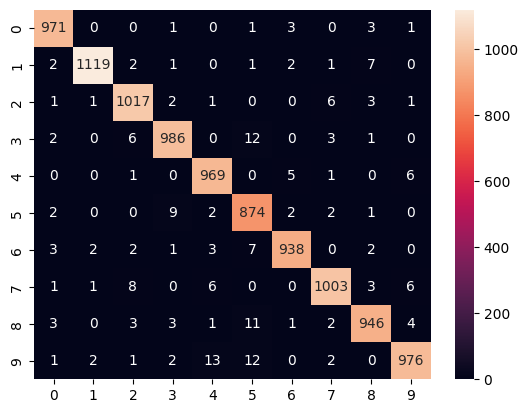

In [12]:
import seaborn as sn
sn.heatmap(cm,fmt='d',annot=True)